In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
# set korean font 
plt.rcParams['font.family'] = 'Malgun Gothic'

In [4]:
# read data bike_use_info

df = pd.read_csv('공공자전거 이용정보.csv', header=0, encoding='cp949')
df.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2021-01-01,0,1347,1347. 길음래미안아파트817동 상가 앞,정기권,NaN,~10대,2,28.90,0.23,992.78,13
1,2021-01-01,0,1349,1349. 월계2교 버스정류장 앞,정기권,NaN,~10대,1,34.38,0.26,1127.50,10
2,2021-01-01,0,1168,1168. 마곡엠밸리10단지 앞,정기권,NaN,~10대,1,0.00,0.00,0.00,7
3,2021-01-01,0,2619,2619. 석촌고분역 4번출구,정기권,NaN,~10대,1,38.75,0.38,1658.34,14
4,2021-01-01,0,536,536. 행당역 2번출구 앞,정기권,NaN,~10대,1,12.96,0.17,743.88,5


In [5]:
# convert column name to eng 
col_list = ['date','rent_hour','st_id','st_name','ticket','gender','age','count','amount','carbon','distance','use_time']
df.columns = col_list
df.head()

,date,rent_hour,st_id,st_name,ticket,gender,age,count,amount,carbon,distance,use_time
0,2021-01-01,0,1347,1347. 길음래미안아파트817동 상가 앞,정기권,NaN,~10대,2,28.90,0.23,992.78,13
1,2021-01-01,0,1349,1349. 월계2교 버스정류장 앞,정기권,NaN,~10대,1,34.38,0.26,1127.50,10
2,2021-01-01,0,1168,1168. 마곡엠밸리10단지 앞,정기권,NaN,~10대,1,0.00,0.00,0.00,7
3,2021-01-01,0,2619,2619. 석촌고분역 4번출구,정기권,NaN,~10대,1,38.75,0.38,1658.34,14
4,2021-01-01,0,536,536. 행당역 2번출구 앞,정기권,NaN,~10대,1,12.96,0.17,743.88,5


In [6]:
# convert date => datetime 
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [7]:
# Checking Nan value
df.isnull().sum()

date              0
rent_hour         0
st_id             0
st_name           0
ticket            0
gender       317622
age               0
count             0
amount            0
carbon            0
distance          0
use_time          0
dtype: int64

In [8]:
# convert gender Nan value => unknown
df['gender'] = df['gender'].fillna('unknown')
# f=> F , m => M
df['gender'].replace('f','F',inplace=True)
df['gender'].replace('m','M',inplace=True)
# checking gender column 
df['gender'].value_counts()

unknown    317622
M          262689
F          138546
Name: gender, dtype: int64

In [9]:
# checking amount, carbon
df['amount'].value_counts()

0.00      73806
\N         4569
2.27        311
9.38        293
9.02        282
          ...  
466.17        1
368.35        1
614.87        1
687.13        1
436.03        1
Name: amount, Length: 51422, dtype: int64

In [10]:
# convert \n value => 0 and convert into float 
df['amount'] = df['amount'].replace('\\N',0).astype(float)
df['carbon'] = df['carbon'].replace('\\N',0).astype(float)


In [11]:
# checking amount column 
df['amount'].value_counts()

0.00       78375
2.27         311
9.38         293
9.02         282
0.01         274
           ...  
535.18         1
490.66         1
1181.41        1
855.39         1
547.50         1
Name: amount, Length: 51421, dtype: int64

In [12]:
# make dataframe which has non-zero value 
df_pure = df[~(df['amount']==0)|~(df['carbon']==0)]


In [13]:
# list of gender, age 
age_list = df['age'].unique().tolist()
gender_list = df['gender'].unique().tolist()

In [14]:
# function to get groupby-agg()
def get_func_by_col(df, target, column, func):
    
    result = df.groupby(target)[column].agg(func)
    return result

In [15]:
# get mean of amount, carbon, distance by age,gender 

mean_amount_pure = get_func_by_col(df_pure,['age','gender'],'amount','mean')
mean_carbon_pure = get_func_by_col(df_pure,['age','gender'],'carbon','mean')
mean_distance_pure = get_func_by_col(df_pure,['age','gender'],'distance','mean')

In [16]:
# function to fill Nan value to mean 

def new_fill_mean(df):
    df_zero = df[df['amount']==0]
    index_list = df_zero.index
    age_list = df.age.unique().tolist()
    gender_list = df.gender.unique().tolist()
    
    for age in age_list:
        
        for gender in gender_list:
            
            avg_amount = mean_amount_pure[age][gender]
            avg_carbon = mean_carbon_pure[age][gender]
            avg_distance = mean_distance_pure[age][gender]
        
            df.loc[(df.age==age)&(df.gender==gender)&(df.amount==0),'amount'] = avg_amount
            df.loc[(df.age==age)&(df.gender==gender)&(df.carbon==0),'carbon'] = avg_carbon
            df.loc[(df.age==age)&(df.gender==gender)&(df.distance==0),'distance'] = avg_distance

In [17]:
# fill Nan value to each mean value by column 
new_fill_mean(df)

In [18]:
# make weekday column 
df['weekday'] = df['date'].dt.day_name()
df.head()

,date,rent_hour,st_id,st_name,ticket,gender,age,count,amount,carbon,distance,use_time,weekday
0,2021-01-01,0,1347,1347. 길음래미안아파트817동 상가 앞,정기권,unknown,~10대,2,28.900000,0.230000,992.780000,13,Friday
1,2021-01-01,0,1349,1349. 월계2교 버스정류장 앞,정기권,unknown,~10대,1,34.380000,0.260000,1127.500000,10,Friday
2,2021-01-01,0,1168,1168. 마곡엠밸리10단지 앞,정기권,unknown,~10대,1,97.785538,0.884148,3811.122037,7,Friday
3,2021-01-01,0,2619,2619. 석촌고분역 4번출구,정기권,unknown,~10대,1,38.750000,0.380000,1658.340000,14,Friday
4,2021-01-01,0,536,536. 행당역 2번출구 앞,정기권,unknown,~10대,1,12.960000,0.170000,743.880000,5,Friday


## bike station 

In [19]:
# read bike station file 
df_station = pd.read_csv('공공자전거 대여소 정보.csv',encoding='cp949')
df_station.head()

,대여소\n번호,보관소(대여소)명,소재지(위치),Unnamed: 3,Unnamed: 4,Unnamed: 5,설치\n시기,설치형태,Unnamed: 8,운영\n방식
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LCD,QR,NaN
1,NaN,NaN,자치구,상세주소,위도,경도,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,거치\n대수,거치\n대수,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,301.0,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130,37.575794,126.971451,2015-10-07,16,NaN,LCD


In [20]:
# convert column name into eng 
col_list2 = ['st_id','st_name','region','address','latitude','longitude','equip_time','num_lcd','num_qr','st_type']
df_station.columns = col_list2

In [21]:
# cleaning df_station 
df_station = df_station.loc[4:2157]

df_station = df_station.fillna(0)

# station_id => int 
df_station['st_id'] = df_station['st_id'].astype(int)

In [22]:
df_station

,st_id,st_name,region,address,latitude,longitude,equip_time,num_lcd,num_qr,st_type
4,301,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130,37.575794,126.971451,2015-10-07,16,0,LCD
5,302,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130,37.575947,126.974060,2015-10-07,12,0,LCD
6,303,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189,37.571770,126.974663,2015-10-07,8,0,LCD
7,304,광화문역 2번출구 앞,종로구,서울특별시 종로구 세종대로 지하172,37.572113,126.977577,2021-01-26,0,7,QR
8,305,종로구청 옆,종로구,서울특별시 종로구 삼봉로 43,37.572582,126.978355,2015-10-07,16,0,LCD
...,...,...,...,...,...,...,...,...,...,...
2153,1085,래미안 솔베뉴(고덕로),강동구,양재대로1650,37.554569,127.145874,2020-01-13,0,20,QR
2154,1086,래미안 솔베뉴(구천면로),강동구,양재대로1650,37.550598,127.145454,2020-01-10,0,10,QR
2155,1088,풍납사거리(강동),강동구,성내동451-3,37.528122,127.119522,2020-01-14,0,12,QR
2156,1089,고덕 래미안힐스테이트(201동),강동구,고덕동 675,37.560600,127.146698,2020-01-13,0,10,QR


In [23]:
# merge bike df and bike station df 
df = pd.merge(df,df_station[['st_id','region','latitude','longitude']], how='inner',on='st_id')


In [24]:
df[['amount','carbon','distance']] = round(df[['amount','carbon','distance']],2)

In [25]:
df.head()

,date,rent_hour,st_id,st_name,ticket,gender,age,count,amount,carbon,distance,use_time,weekday,region,latitude,longitude
0,2021-01-01,0,1347,1347. 길음래미안아파트817동 상가 앞,정기권,unknown,~10대,2,28.90,0.23,992.78,13,Friday,성북구,37.607105,127.021500
1,2021-01-01,0,1347,1347. 길음래미안아파트817동 상가 앞,정기권,unknown,20대,1,11.24,0.07,283.72,1,Friday,성북구,37.607105,127.021500
2,2021-01-01,2,1347,1347. 길음래미안아파트817동 상가 앞,일일권,unknown,20대,1,42.24,0.43,1839.04,37,Friday,성북구,37.607105,127.021500
3,2021-01-01,2,1347,1347. 길음래미안아파트817동 상가 앞,일일권,M,20대,2,50.75,0.44,1912.72,73,Friday,성북구,37.607105,127.021500
4,2021-01-01,5,1347,1347. 길음래미안아파트817동 상가 앞,일일권,M,~10대,1,183.65,1.66,7134.79,47,Friday,성북구,37.607105,127.021500


In [26]:
# save df => csv 
df.to_csv('bike_merge.csv')

### Analyse by age 
    => avg numeric(carbon,amount,distance,use_time) by age

In [33]:
def mean_graph_list_save():
    target_list = ['amount', 'carbon', 'distance', 'use_time']
    name_list = ['평균 운동량', '평균 탄소감축량', '평균 이동거리', '평균 사용 시간']
    for i in range(len(target_list)):
        img_path = '연령대 별 %s' %(name_list[i])
        plt.figure(figsize=(15,6))
        mean_target = df.groupby('age')[target_list[i]].mean().sort_values(ascending=False)
        mean_target.plot.bar()
        plt.xlabel('연령대')
        plt.ylabel(name_list[i])
        plt.title('%s 별 %s' %('연령대',name_list[i]))
#         img_path = '/'+ img_path
        
        plt.savefig(img_path)

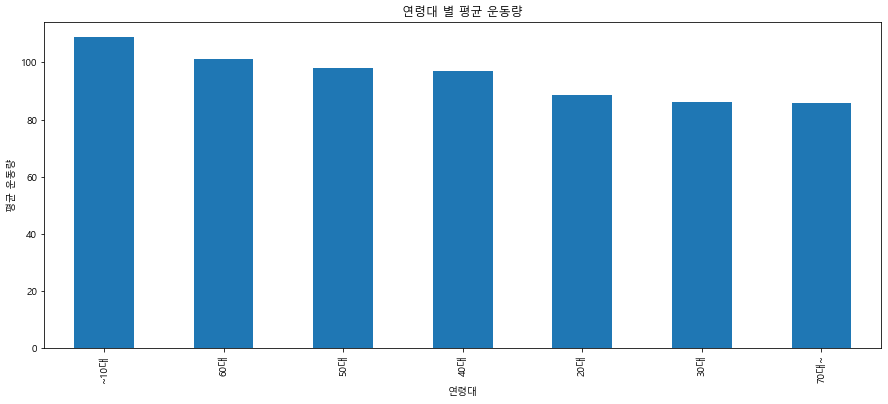

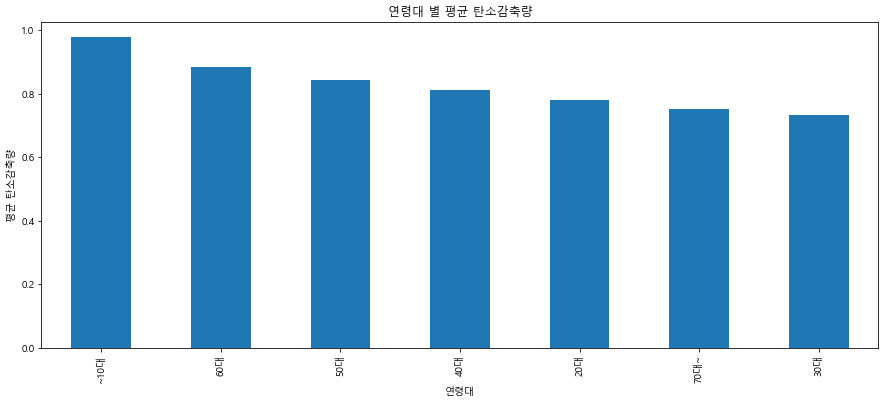

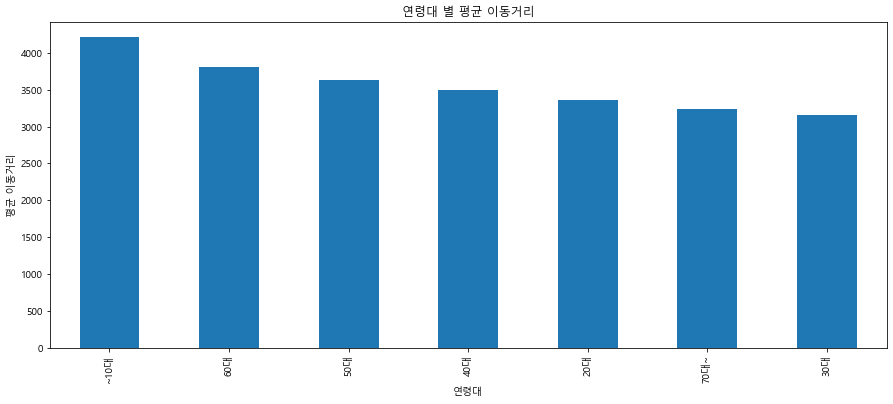

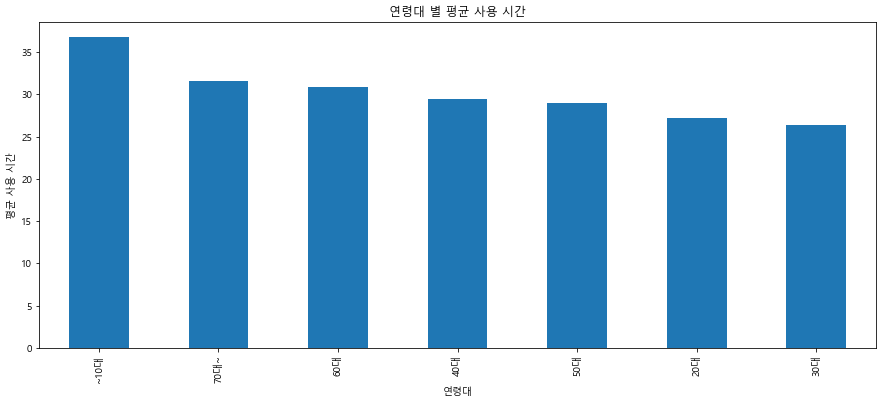

In [34]:
mean_graph_list_save()

### analyse by weekday 
    1. count 
    2. count by age
    3. count by gender
    4. avg amount

In [35]:
# weekday list
weekday_index = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

In [36]:
# 플롯 그리는 함수
def getPlot(mean_data,x,y):
    
    plt.figure(figsize=(12,6))
    plt.plot(mean_data)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title('%s 별 %s' %(x,y))
    plt.savefig('%s 별 %s' %(x,y))
#     plt.show()

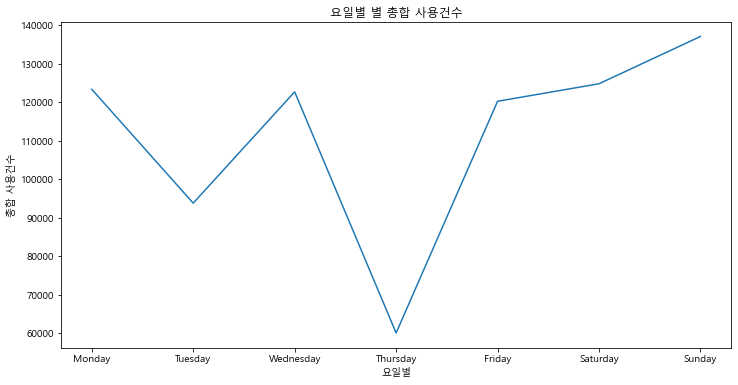

In [40]:
# sum count by weekday
getPlot(get_func_by_col(df, 'weekday','count','sum').reindex(weekday_index), x='요일별',y='총합 사용건수')

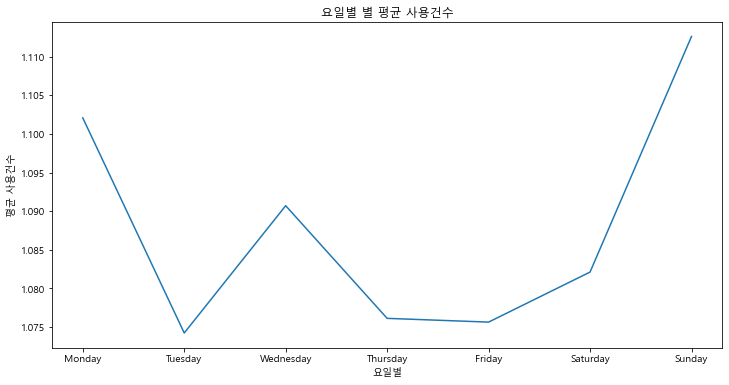

In [39]:
# avg count by weekday 
getPlot(get_func_by_col(df,'weekday','count','mean').reindex(weekday_index), x='요일별',y='평균 사용건수')

#### 2-2. count by age

In [41]:
# set age list 
age_index =['~10대','20대','30대','40대','50대','60대','70대~']

In [45]:
# plot function to get by age 
def graph_col_by_target(df,target,target2,column,func):
    plt.figure(figsize=(15,6))
    ax = sns.barplot(data=df,x=target,y=column,hue=target2,estimator=func)
    ax.set(xlabel=target, ylabel=column, title='요일별 연령별 %s' %column)

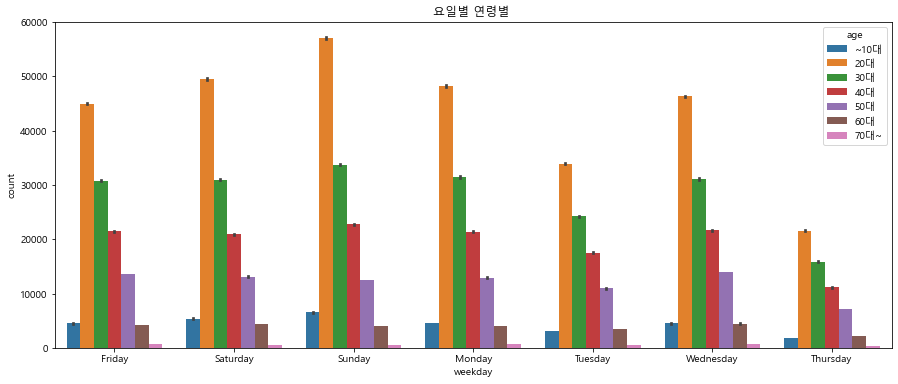

In [44]:
# plot total count of weekday by age
graph_col_by_target(df,'weekday','age','count',sum)

#### 2-3. count by gender

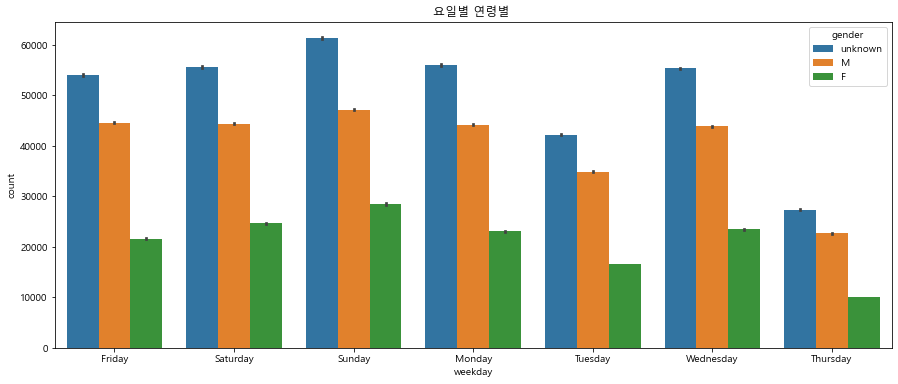

In [51]:
# plot total count of weekday by gender
graph_col_by_target(df,'weekday','gender','count',sum)

#### 2-4.avg amount,distance,carbon by weeday

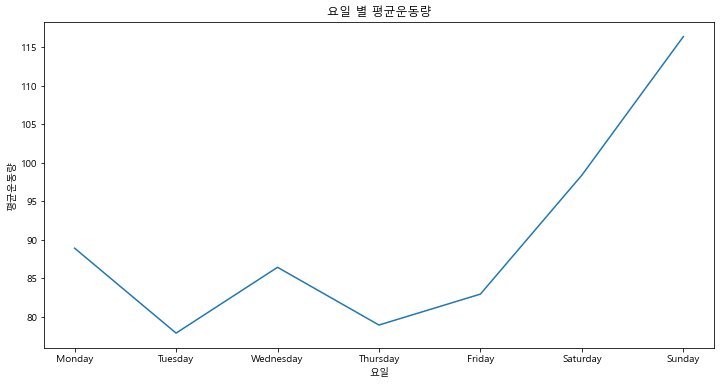

In [56]:
# avg amount by weekday 
#get_func_by_col(df, target, column, func):
getPlot(get_func_by_col(df,'weekday','amount','mean').reindex(weekday_index),x='요일',y='평균운동량')

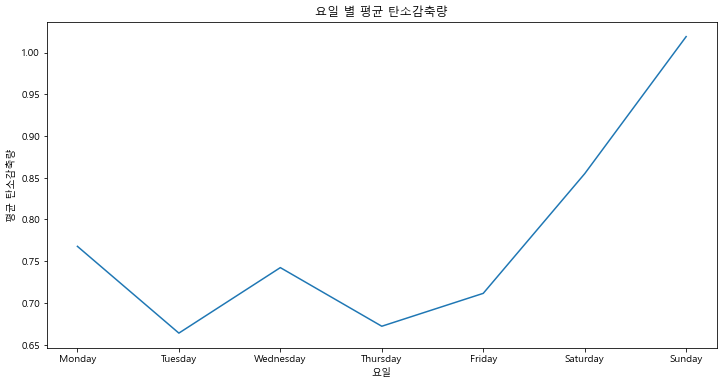

In [59]:
# avg carbon 
getPlot(get_func_by_col(df,'weekday','carbon','mean').reindex(weekday_index),x='요일',y='평균 탄소감축량')

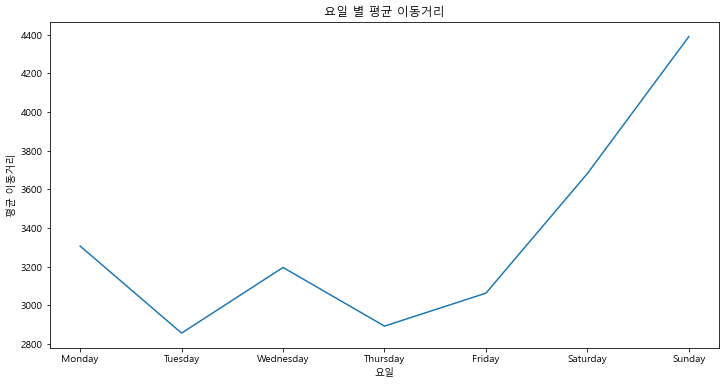

In [60]:
# avg distance
getPlot(get_func_by_col(df,'weekday','distance','mean').reindex(weekday_index),x='요일',y='평균 이동거리')

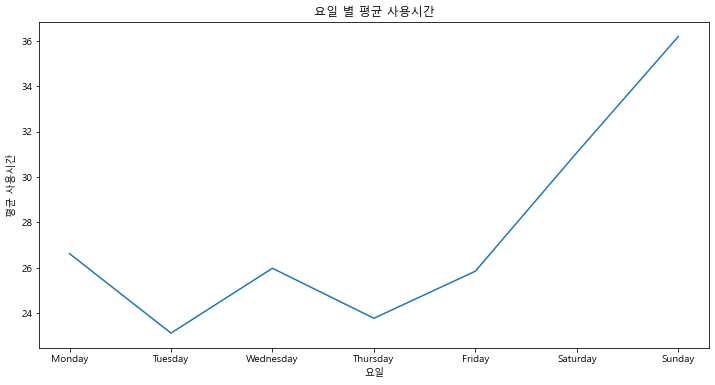

In [61]:
# avg use_time 
getPlot(get_func_by_col(df,'weekday','use_time','mean').reindex(weekday_index),x='요일',y='평균 사용시간')

### 3. info by hour
    1. avg, total count by hour 
    2. avg, total use time by hour

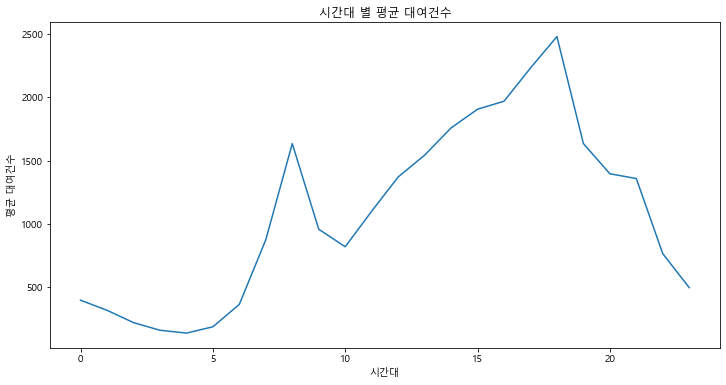

In [62]:
# total count by hour
getPlot(get_func_by_col(df,'rent_hour','count','sum')/len(df['date'].unique()),x='시간대',y='평균 대여건수')

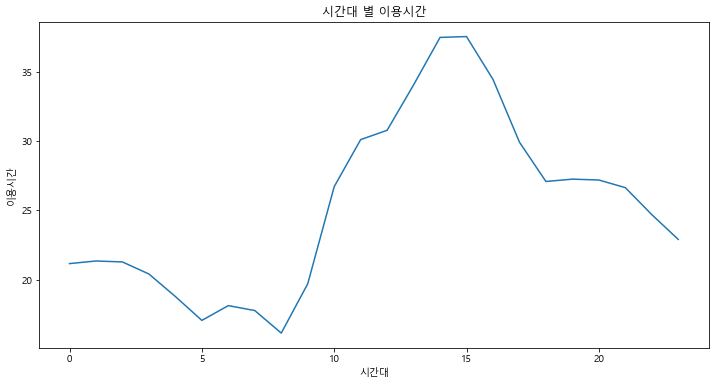

In [64]:
# total use time by hour 
getPlot(get_func_by_col(df,'rent_hour','use_time','sum')/get_func_by_col(df,'rent_hour','use_time','count'),x='시간대',y='이용시간')

#### 4. analyse by region
    1. total count of user 
    2. count by hour 
    3. count by age

In [67]:
def getGraphV(mean_data,x,y):
    
    plt.figure(figsize=(15,6))
    mean_data.plot.barh()
    
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title('%s 별 %s' %(y,x)) 
#     plt.show()
    plt.savefig('%s 별 %s' %(y,x))

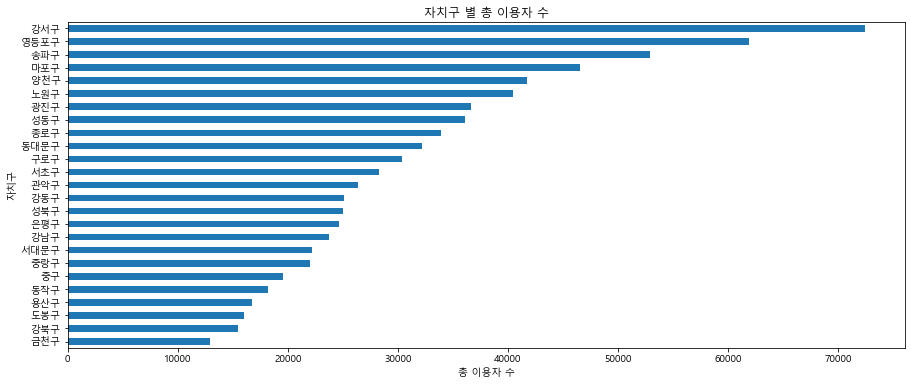

In [71]:
# total count of user by region
getGraphV(get_func_by_col(df,'region','count','sum').sort_values(ascending=True),x='총 이용자 수',y='자치구')

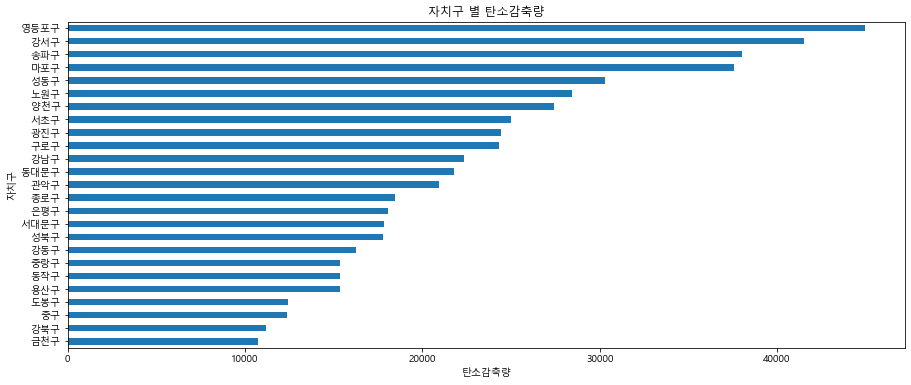

In [72]:
# total carbon amount by region 
getGraphV(get_func_by_col(df,'region','carbon','sum').sort_values(ascending=True), x='탄소감축량',y='자치구')

### analyse by my_info

In [76]:
def compare_graph(target,my_info,x):
    column_list = ['amount','carbon','distance','use_time']
    y = ['운동량','탄소감축량','이동거리','사용시간']
    for i in range(len(column_list)):
        mean_data = get_func_by_col(df,target,column_list[i],'mean')
        
#       fig, ax = plt.subplots(1,len(my_info),i+1,figsize=(15,6))
        plt.figure(figsize=(15,6))    
        mean_data.plot.bar()
        plt.xlabel(x)
        plt.ylabel(y[i])
        plt.title('%s 별 평균 %s' %(x,y[i]))
        plt.axhline(my_info[column_list[i]], linewidth=2, color='red',label='내 {}'.format(y[i]))
        plt.axhline(df[df[target]==my_info[target]][column_list[i]].mean(), color='green',label='나와 비슷한 {} {}'.format(x,y[i]))
        plt.legend()
        plt.savefig('내 %s 별 평균 %s  과의 비교' %(x,y[i]))

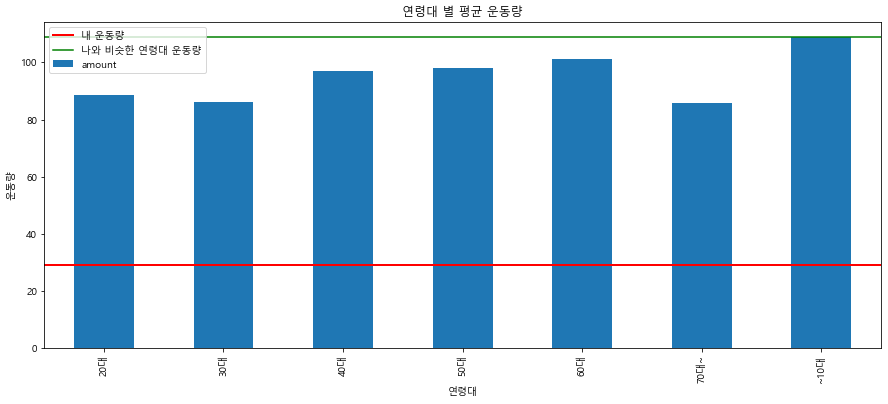

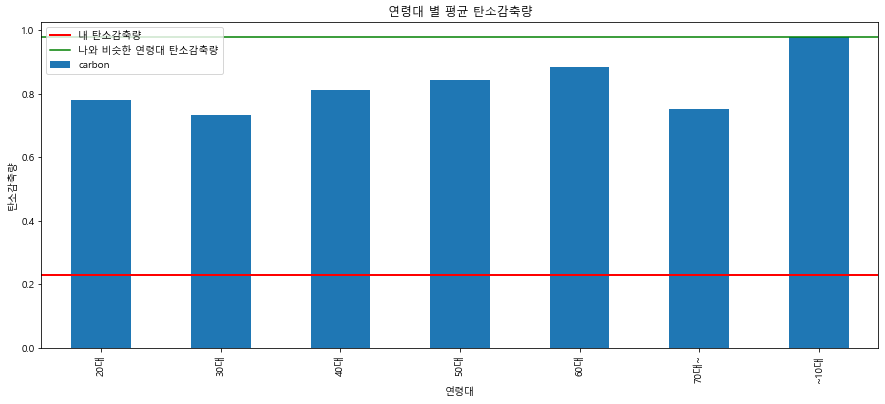

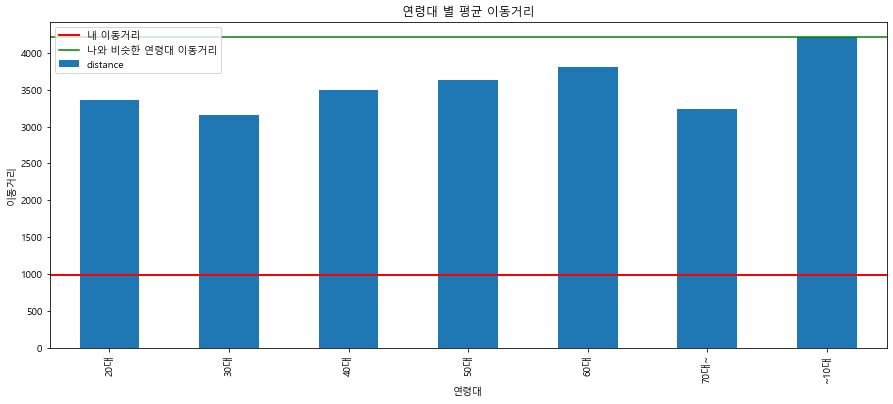

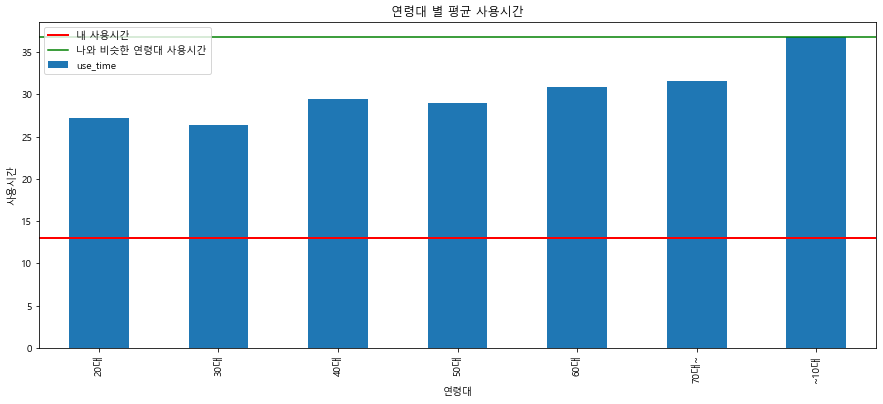

In [77]:
# test_user = df.loc[0]
compare_graph('age',df.loc[0],'연령대')

### analyse numeric data by age, gender

In [78]:
#성별별 연령별 평균 데이터
def graph_list_by_type():
    target_list = ['amount', 'carbon', 'distance', 'use_time']
    name_list = ['평균 운동량', '평균 탄소감축량', '평균 이동거리', '평균 사용 시간']
    for i in range(len(target_list)):
#       fig,axes=plt.subplots(1,4)
        plt.subplots(figsize=(15,6))
        ax= sns.barplot(data=df,x='gender',y=target_list[i],hue='age')
        ax.set(xlabel='성별',ylabel=name_list[i],title='성별별 연령별 %s' %(name_list[i]))
        plt.savefig('성별별 연령별 %s' %(name_list[i]))
    

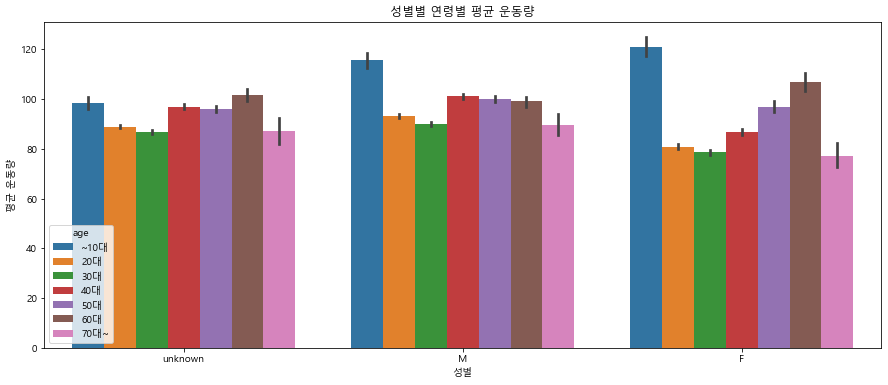

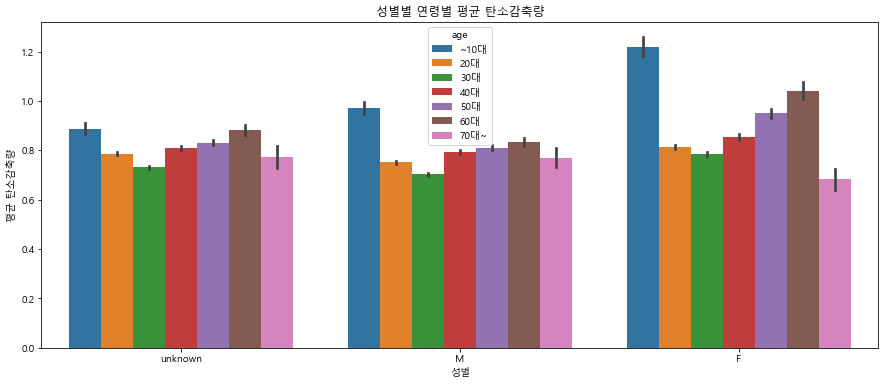

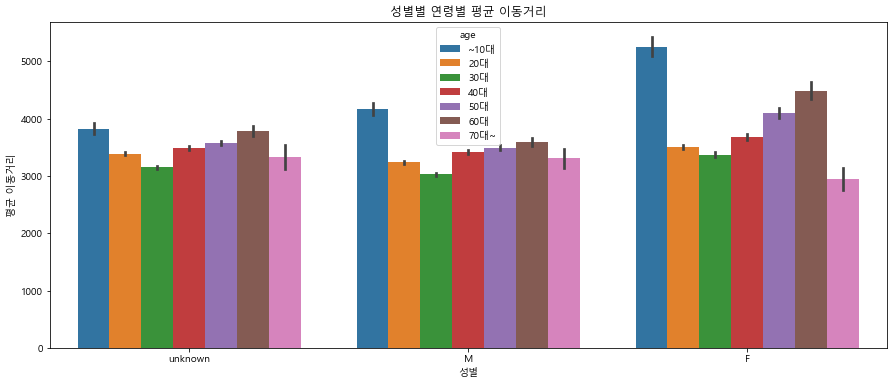

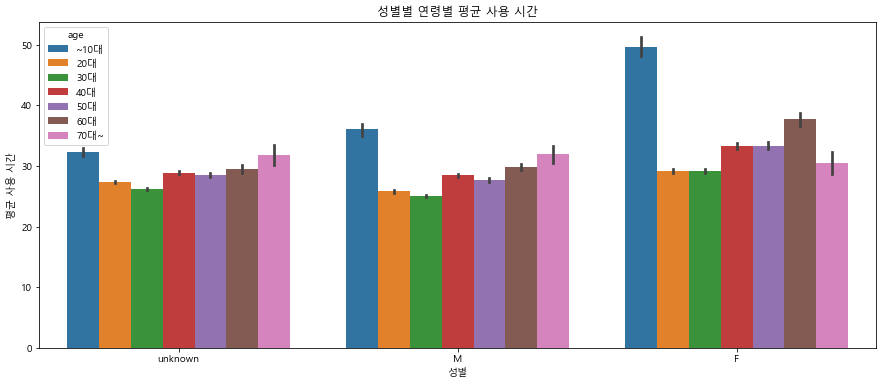

In [79]:
graph_list_by_type()